In [21]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
records = pd.read_csv('../data/cleaned_texts_oct19_2016.tsv', sep='\t')
records = records[records.pub_year > 1499]
records = records[records.pub_year < 1600]

In [23]:
len(records)

10500

In [24]:
records.head(1)

,Unnamed: 0,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country
522,670,14321112,libro de proprietatibus rerum en romancehystor...,NaN,bartholomaeus,"gaspar de avila, a costa de joan thomas fabio",toledo,1529,NaN,NaN,"toledo,spain",toledo,spain


In [25]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

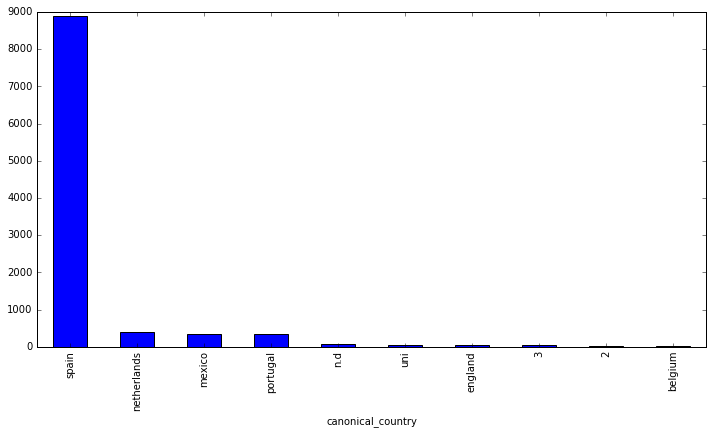

In [26]:
records.groupby('canonical_country').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].plot(kind="bar")

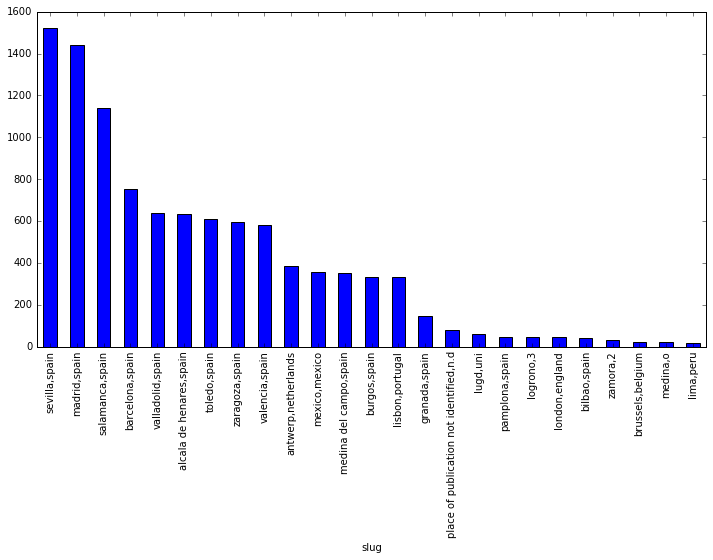

In [27]:
records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:25].plot(kind="bar")

## Global Publication By Year

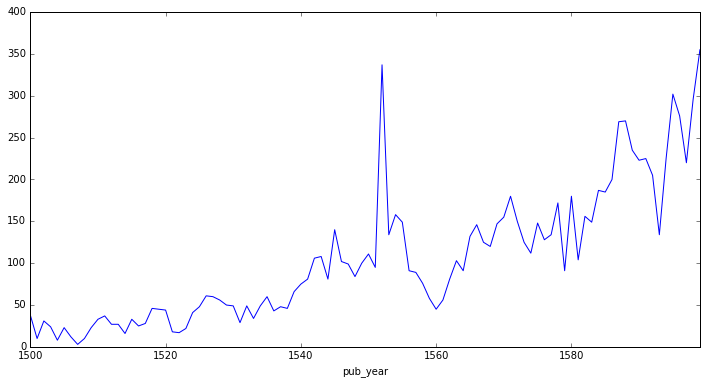

In [28]:
records.sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [29]:
# records[records.pub_year < 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [30]:
# records[records.pub_year > 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [31]:
top_slugs = records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].index

In [32]:
top_producers = records[records.slug.isin(top_slugs)]
top_slugs

Index(['sevilla,spain', 'madrid,spain', 'salamanca,spain', 'barcelona,spain',
       'valladolid,spain', 'alcala de henares,spain', 'toledo,spain',
       'zaragoza,spain', 'valencia,spain', 'antwerp,netherlands'],
      dtype='object', name='slug')

In [33]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

In [34]:
top_producer_df = pd.DataFrame({
    'sevilla,spain': group_top_producers.ix['madrid,spain'],
    'madrid,spain': group_top_producers.ix['madrid,spain'],
    'salamanca,spain': group_top_producers.ix['salamanca,spain'],
    'barcelona,spain': group_top_producers.ix['barcelona,spain'],
    'valladolid,spain': group_top_producers.ix['valladolid,spain'],
    'alcala de henares,spain': group_top_producers.ix['alcala de henares,spain'],
    'toledo,spain': group_top_producers.ix['toledo,spain'],
    'zaragoza,spain': group_top_producers.ix['zaragoza,spain'],
    'valencia,spain': group_top_producers.ix['valencia,spain'],
    'antwerp,netherlands': group_top_producers.ix['antwerp,netherlands'],
}).fillna(0)

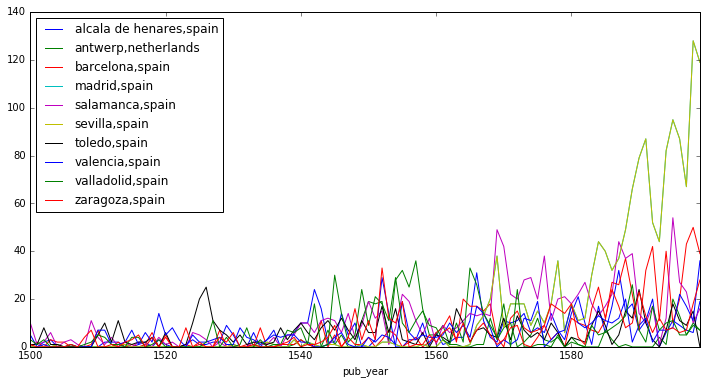

In [35]:
top_producer_df.plot()

In [50]:
top_producer_df

,"alcala de henares,spain","antwerp,netherlands","barcelona,spain","madrid,spain","salamanca,spain","sevilla,spain","toledo,spain","valencia,spain","valladolid,spain","zaragoza,spain"
pub_year,,,,,,,,,,
1500,0,0,0,0,10,0,1,5,3,1
1501,0,0,2,0,1,0,1,0,1,0
1502,2,0,0,0,2,0,8,1,3,0
1503,3,0,3,0,6,0,1,0,0,0
1504,0,0,2,1,0,1,1,0,0,0
1505,0,0,2,0,2,0,0,0,0,0
1506,0,0,0,0,3,0,0,1,1,1
1507,0,0,0,0,1,0,0,0,0,0
1508,0,0,0,0,0,0,0,0,1,4


In [49]:
counted_by_year = records.sort_values('pub_year').groupby('pub_year').count()['control_number']
counted_by_year

pub_year
1500     38
1501     10
1502     31
1503     24
1504      8
1505     23
1506     12
1507      3
1508     10
1509     23
1510     33
1511     37
1512     27
1513     27
1514     16
1515     33
1516     25
1517     28
1518     46
1519     45
1520     44
1521     18
1522     17
1523     22
1524     41
1525     48
1526     61
1527     60
1528     56
1529     50
       ... 
1570    155
1571    180
1572    150
1573    125
1574    112
1575    148
1576    128
1577    134
1578    172
1579     91
1580    180
1581    104
1582    156
1583    149
1584    187
1585    185
1586    200
1587    269
1588    270
1589    235
1590    223
1591    225
1592    205
1593    134
1594    225
1595    302
1596    276
1597    220
1598    296
1599    355
Name: control_number, dtype: int64

In [52]:
top_producer_df_percent = pd.DataFrame({
    'sevilla,spain': top_producer_df['madrid,spain'].div(counted_by_year.values),
    'madrid,spain': top_producer_df['madrid,spain'].div(counted_by_year.values),
    'salamanca,spain': top_producer_df['salamanca,spain'].div(counted_by_year.values),
    'barcelona,spain': top_producer_df['barcelona,spain'].div(counted_by_year.values),
    'valladolid,spain': top_producer_df['valladolid,spain'].div(counted_by_year.values),
#     'alcala de henares,spain': top_producer_df['alcala de henares,spain'].div(counted_by_year.values),
#     'toledo,spain': top_producer_df['toledo,spain'].div(counted_by_year.values),
#     'zaragoza,spain': top_producer_df['zaragoza,spain'].div(counted_by_year.values),
#     'valencia,spain': top_producer_df['valencia,spain'].div(counted_by_year.values),
#     'antwerp,netherlands': top_producer_df['antwerp,netherlands'].div(counted_by_year.values),
})

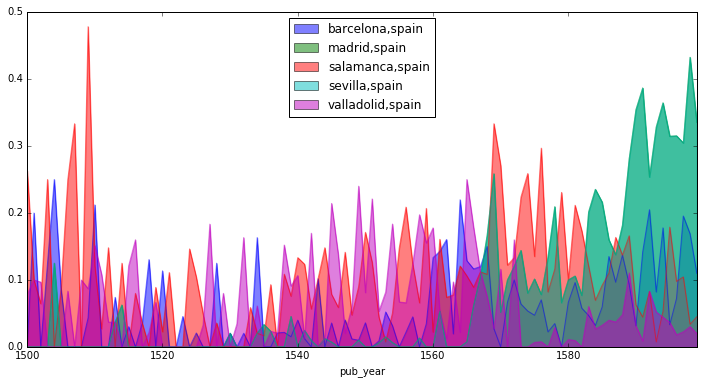

In [53]:
top_producer_df_percent.plot.area(stacked=False)